In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json.json to kaggle.json.json


{'kaggle.json.json': b'{"username":"najlafathi","key":"63a7c6ccd622e3ecfa0bfb8ed7876fe5"}'}

In [ ]:
!pip install kaggle
!mv kaggle.json.json kaggle.json
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!ls

healthcare-dataset-stroke-data.csv  sample_data
kaggle.json			    stroke-prediction-dataset.zip


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset



Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip stroke-prediction-dataset.zip

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df["stroke"].value_counts(normalize=True)

,proportion
stroke,
0,0.951272
1,0.048728


In [ ]:
df=df.drop("id",axis=1)

In [ ]:
X=df.drop('stroke', axis=1)
y=df["stroke"]

In [ ]:
X.shape


(5110, 10)

In [ ]:
y.shape

(5110,)

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,0


In [ ]:
missing_counts=df.isnull().sum()
total_counts=len(df)
missing_percentage=(missing_counts/total_counts)*100
print(f"BMI missing_percentage: {missing_percentage["bmi"]:.2f}%")

BMI missing_percentage: 3.93%


In [ ]:
df=df.dropna()

In [ ]:
df["bmi"]=df["bmi"].fillna(df["bmi"].mean())

In [ ]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
df=pd.get_dummies(df, drop_first=True)
df.dtypes

,0
age,float64
hypertension,int64
heart_disease,int64
avg_glucose_level,float64
bmi,float64
stroke,int64
gender_Male,bool
gender_Other,bool
ever_married_Yes,bool
work_type_Never_worked,bool


In [ ]:
print(df.select_dtypes(exclude=["int64","float64","bool"]).columns)

Index([], dtype='object')


In [ ]:
df.astype(int)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,1,0,1,0,1,0,0,1,1,0,0
2,80,0,1,105,32,1,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,1,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,1,0,0,1,0,0,1,0,0,0,1,0
5,81,0,0,186,29,1,1,0,1,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103,18,0,0,0,0,0,0,0,1,0,0,0,0
5106,81,0,0,125,40,0,0,0,1,0,0,1,0,1,0,1,0
5107,35,0,0,82,30,0,0,0,1,0,0,1,0,0,0,1,0
5108,51,0,0,166,25,0,1,0,1,0,1,0,0,0,1,0,0


In [ ]:
X=df.drop('stroke', axis=1)
y=df["stroke"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logi= LogisticRegression(max_iter=1000)
logi.fit(X_train,y_train)
y_pred=logi.predict(X_test_scaled)
y_pred_prob=logi.predict_proba(X_test_scaled)
print("Accuracy", accuracy_score(y_test,y_pred))
print("ClassificationReport" , classification_report(y_test,y_pred))
print("ConfusionMatrix", confusion_matrix(y_test,y_pred))

Accuracy 0.9460285132382892
ClassificationReport               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

ConfusionMatrix [[929   0]
 [ 53   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
logi=LogisticRegression(max_iter=2000, class_weight="balanced" , solver="lbfgs")
logi.fit(X_train_scaled,y_train)
y_pred_prob_bal= logi.predict_proba(X_test_scaled)[:,1]
y_pred_bal=(y_pred_prob_bal>= 0.5).astype(int)
print("Classification report",classification_report(y_test, y_pred))
print("Confusion matix",confusion_matrix(y_test, y_pred))
print("Accuracy score",accuracy_score(y_test, y_pred))
print("Roc-auc-score",roc_auc_score(y_test, y_pred_prob))

Classification report               precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.80      0.56       982
weighted avg       0.94      0.75      0.82       982

Confusion matix [[689 240]
 [  8  45]]
Accuracy score 0.7474541751527495
Roc-auc-score 0.8512703860917602


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve , roc_auc_score, accuracy_score, confusion_matrix, classification_report
logi=LogisticRegression(max_iter=2000, class_weight="balanced" , solver="lbfgs")
logi.fit(X_train_scaled,y_train)
y_pred_prob_bal= logi.predict_proba(X_test_scaled)[:,1]
precisions, recalls, thresholds= precision_recall_curve(y_test, y_pred_prob_bal)
f1_scores=2*(precisions[:-1]*recalls[:-1])/(precisions[:-1] +recalls[:-1])
best_idx=np.argmax(f1_scores)
best_threshold=thresholds[best_idx]
y_pred_opt=(y_pred_prob_bal>=best_threshold).astype(int)
print("Classification report",classification_report(y_test, y_pred))
print("Confusion matix",confusion_matrix(y_test, y_pred))
print("Accuracy score",accuracy_score(y_test, y_pred))
print("Roc-auc-score",roc_auc_score(y_test, y_pred_prob))


Classification report               precision    recall  f1-score   support

           0       0.99      0.74      0.85       929
           1       0.16      0.85      0.27        53

    accuracy                           0.75       982
   macro avg       0.57      0.80      0.56       982
weighted avg       0.94      0.75      0.82       982

Confusion matix [[689 240]
 [  8  45]]
Accuracy score 0.7474541751527495
Roc-auc-score 0.8512703860917602


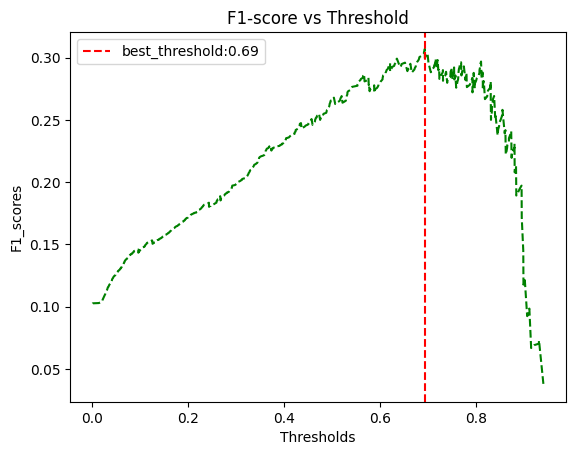

In [ ]:
import matplotlib.pyplot as plt
plt.plot(thresholds,f1_scores, color="green", linestyle="--")
plt.axvline(best_threshold, color="red", linestyle="--", label=f"best_threshold:{best_threshold:.2f}")
plt.xlabel("Thresholds")
plt.ylabel("F1_scores")
plt.title("F1-score vs Threshold")
plt.legend()
plt.show()


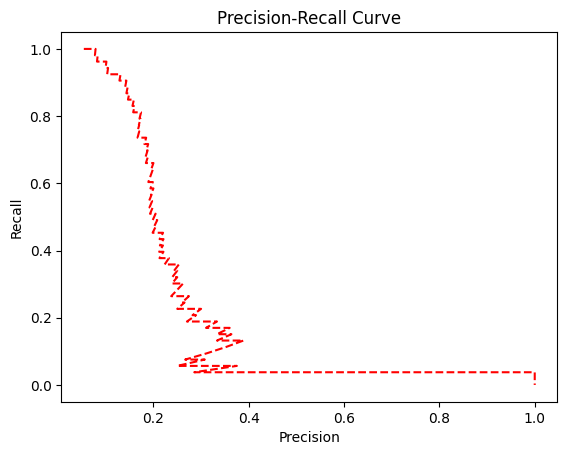

In [ ]:
import matplotlib.pyplot as plt
plt.plot(precisions,recalls,color="red", linestyle='--')
plt.title("Precision-Recall Curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.show()

In [ ]:
import numpy as np
import pandas as pd
coefficients=logi.coef_[0]
feature_importance=pd.DataFrame({"feature":X.columns,"coefficient":coefficients, "abs_coefficients": np.abs(coefficients)})
feature_importance=feature_importance.sort_values(by="abs_coefficients", ascending=False)
print(feature_importance)

                           feature  coefficient  abs_coefficients
0                              age     1.837508          1.837508
11              work_type_children     0.470677          0.470677
8           work_type_Never_worked    -0.196430          0.196430
15           smoking_status_smokes     0.177514          0.177514
1                     hypertension     0.176943          0.176943
10         work_type_Self-employed    -0.164771          0.164771
3                avg_glucose_level     0.149472          0.149472
4                              bmi     0.145087          0.145087
13  smoking_status_formerly smoked     0.067359          0.067359
6                     gender_Other    -0.060715          0.060715
12            Residence_type_Urban     0.053963          0.053963
2                    heart_disease     0.042021          0.042021
5                      gender_Male    -0.010417          0.010417
9                work_type_Private     0.009415          0.009415
14     smo

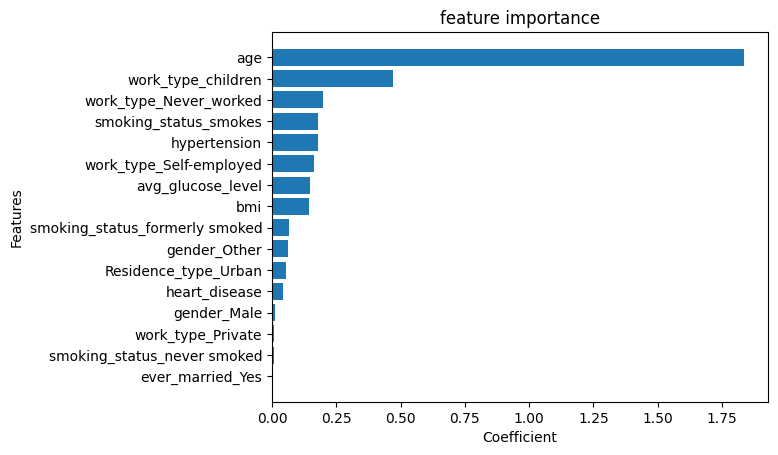

In [ ]:
import matplotlib.pyplot as plt
plt.barh(feature_importance["feature"],feature_importance["abs_coefficients"])
plt.gca().invert_yaxis()
plt.xlabel("Coefficient")
plt.ylabel("Features")
plt.title("feature importance")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score
top_features=feature_importance.head(10)["feature"].tolist()
print(top_features)
X_train_top=X_train[top_features]
X_test_top=X_test[top_features]
logi_top= LogisticRegression(max_iter=2000, random_state=42, class_weight="balanced", solver="lbfgs")
logi_top.fit(X_train_top,y_train)
y_pred_top=logi_top.predict(X_test_top)
y_pred_prob_top=logi_top.predict_proba(X_test_top)[:,1]
print("Classification report",classification_report(y_test, y_pred_top))
print("Confusion matix",confusion_matrix(y_test, y_pred_top))
print("Accuracy score",accuracy_score(y_test, y_pred_top))


['age', 'work_type_children', 'work_type_Never_worked', 'smoking_status_smokes', 'hypertension', 'work_type_Self-employed', 'avg_glucose_level', 'bmi', 'smoking_status_formerly smoked', 'gender_Other']
Classification report               precision    recall  f1-score   support

           0       0.99      0.73      0.84       929
           1       0.15      0.85      0.26        53

    accuracy                           0.74       982
   macro avg       0.57      0.79      0.55       982
weighted avg       0.94      0.74      0.81       982

Confusion matix [[682 247]
 [  8  45]]
Accuracy score 0.7403258655804481


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve , roc_auc_score, accuracy_score, confusion_matrix, classification_report
precisions, recalls, thresholds= precision_recall_curve(y_test, y_pred_prob_top)
probs= y_pred_prob_top
target_recall=0.82
idx=np.where(recalls[:-1]>= target_recall)[0]
best_threshold_low= thresholds[idx[0]]
best_threshold_high= thresholds[idx[-1]]
y_pred_recall_low=(probs>=best_threshold_high).astype(int)
y_pred_recall_high=(probs>=best_threshold_low).astype(int)

for t,r in zip(thresholds,recalls[:-1]):
  print(f" Threshold:{t:.3f},Recall:{r:.3f}")
print("All thresholds where recalls>=0.82")
for i in idx:
  print(f"index:{i}, Threshold:{thresholds[i]}, Recall:{recalls[i]}")

print("=== High Threshold (idx[-1]) ===")
print("Threshold:", best_threshold_high)
print("ROC AUC:", roc_auc_score(y_test, probs))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_recall_low))
print("Classification Report:\n", classification_report(y_test,y_pred_recall_low))
print("Accuracy:", accuracy_score(y_test, y_pred_recall_low))
print("\n")
print("===Low Threshold (idx[0]) ===")
print("Threshold:", best_threshold_low)
print("ROC AUC:", roc_auc_score(y_test, probs))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred_recall_high))
print("Classification Report:\n", classification_report(y_test,y_pred_recall_high))
print("Accuracy:", accuracy_score(y_test,y_pred_recall_high))
print("\n")


 Threshold:0.010,Recall:1.000
 Threshold:0.014,Recall:1.000
 Threshold:0.015,Recall:1.000
 Threshold:0.015,Recall:1.000
 Threshold:0.015,Recall:1.000
 Threshold:0.016,Recall:1.000
 Threshold:0.017,Recall:1.000
 Threshold:0.018,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.019,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.020,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.021,Recall:1.000
 Threshold:0.022,Recall:1.000
 Threshold:0.022,Recall:1.000
 Threshold:0.022,Recall:1.000
 Threshold:0.022,Recall:1.000
 Threshold:0.022,Recall:1.000
 Threshold

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


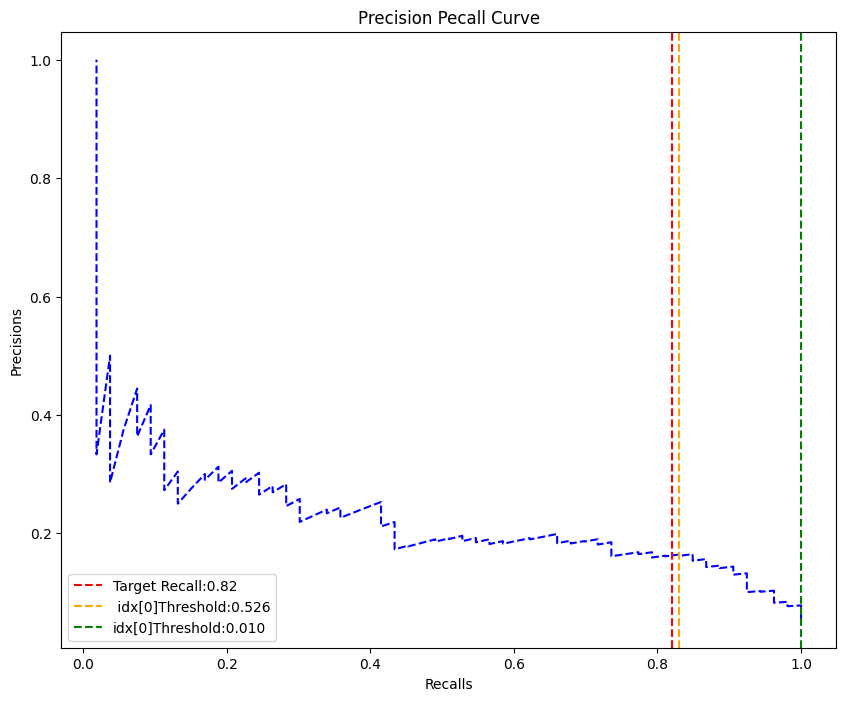

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
probs= y_pred_prob_top
precisions, recalls, thresholds=precision_recall_curve(y_test,probs)
plt.figure(figsize=(10,8))
plt.plot(recalls[:-1], precisions[:-1], color="blue" , linestyle="--")
plt.axvline(x=target_recall, color="red" , linestyle="--", label=f"Target Recall:{target_recall}")
plt.axvline(x=recalls[idx[-1]],color="orange", linestyle="--", label=f" idx[0]Threshold:{thresholds[idx[-1]]:.3f}")
plt.axvline(x=recalls[idx[0]],color="green", linestyle="--", label=f"idx[0]Threshold:{thresholds[idx[0]]:.3f}")
plt.xlabel("Recalls")
plt.ylabel("Precisions")
plt.title("Precision Pecall Curve")
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=42)
param_grid={"n_estimators":[50,100,200], "max_depth":[None,5,10], "min_samples_split":[2,5,10]}
grid_search=GridSearchCV(rf, param_grid, cv=5 , n_jobs=-1, scoring= "roc_auc")
grid_search.fit(X_train_top, y_train)
print("Best Params", grid_search.best_params_)
print("Best score", grid_search.best_score_)

Best Params {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best score 0.8312510706269546


In [ ]:
from sklearn.model_selection import GridSearchCV
best_rf=grid_search.best_estimator_
best_rf.fit(X_train_top,y_train)
y_pred_tun =best_rf.predict(X_test_top)
y_pred_tun_prob= best_rf.predict_proba(X_test_top)[:,1]
print("ROC AUC:", roc_auc_score(y_test,y_pred_tun_prob ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tun))
print("Classification Report:\n", classification_report(y_test,y_pred_tun))
print("Accuracy:", accuracy_score(y_test, y_pred_tun))

ROC AUC: 0.8450758575867741
Confusion Matrix:
 [[929   0]
 [ 53   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982

Accuracy: 0.9460285132382892


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds=precision_recall_curve(y_test,y_pred_tun_prob)
probos_tun=best_rf.predict_proba(X_test_top)[:,1]
best_threshold_tun=thresholds[idx[-1]]
y_pred_tun=(probos_tun>=best_threshold_tun).astype(int)
print("ROC AUC:", roc_auc_score(y_test, probos_tun ))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tun))
print("Classification Report:\n", classification_report(y_test,y_pred_tun))
print("Accuracy:", accuracy_score(y_test, y_pred_tun))

ROC AUC: 0.8450758575867741
Confusion Matrix:
 [[762 167]
 [ 19  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89       929
           1       0.17      0.64      0.27        53

    accuracy                           0.81       982
   macro avg       0.57      0.73      0.58       982
weighted avg       0.93      0.81      0.86       982

Accuracy: 0.8105906313645621
